# Import Packages & Load Dataset from Kaggle

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\naila\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1


In [4]:
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Exploratory Data Analysis

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.drop(columns=['customerID'], inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

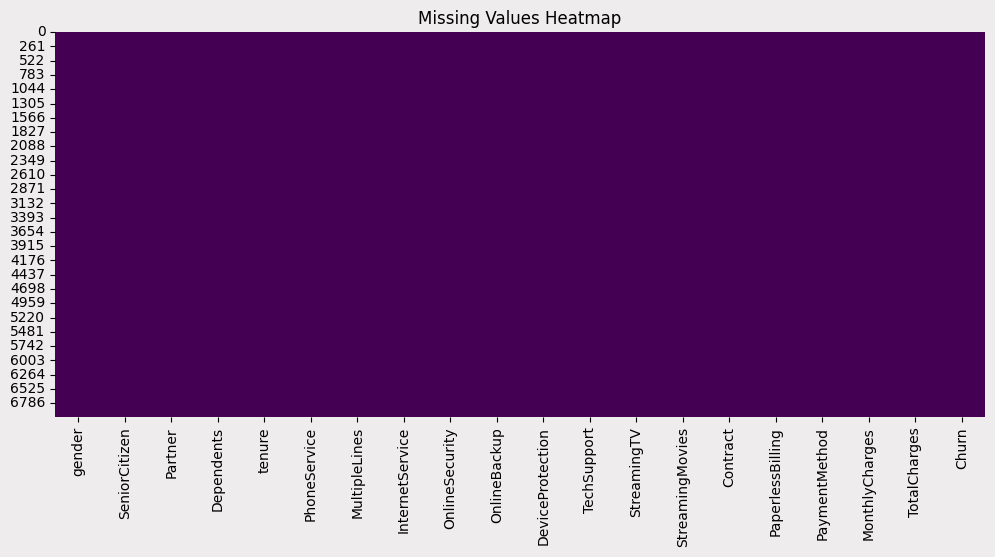

In [10]:
# Cek Missing Value

plt.figure(figsize=(12, 5),facecolor='#eeecec')
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [11]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df[df['TotalCharges'].isna()][['tenure','MonthlyCharges','TotalCharges','Churn']]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,NaN,No
753,0,20.25,NaN,No
936,0,80.85,NaN,No
1082,0,25.75,NaN,No
1340,0,56.05,NaN,No
3331,0,19.85,NaN,No
3826,0,25.35,NaN,No
4380,0,20.00,NaN,No
5218,0,19.70,NaN,No
6670,0,73.35,NaN,No


In [13]:
df['TotalCharges'].fillna(0, inplace=True)

In [14]:
for i in df.columns:
    print(i, df[i].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.

# Data Preprocessing

Encoding dengan One Hot Encoder

In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

encoded_data = encoder.fit_transform(df[categorical_cols + numerical_cols])

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

encoded_df


,cat__gender_Female,cat__gender_Male,cat__Partner_No,cat__Partner_Yes,cat__Dependents_No,cat__Dependents_Yes,cat__PhoneService_No,cat__PhoneService_Yes,cat__MultipleLines_No,cat__MultipleLines_No phone service,...,cat__PaperlessBilling_No,cat__PaperlessBilling_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,num__SeniorCitizen,num__tenure,num__MonthlyCharges,num__TotalCharges
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.85,29.85
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,56.95,1889.50
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,53.85,108.15
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,45.0,42.30,1840.75
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,24.0,84.80,1990.50
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,72.0,103.20,7362.90
7040,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11.0,29.60,346.45
7041,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,74.40,306.60


In [16]:
# Concat dengan kolom Churn
final_df = pd.concat([
    df[['Churn']].reset_index(drop=True),
    encoded_df.reset_index(drop=True)        
], axis=1)

final_df['Churn'] = final_df['Churn'].map({'No': 0, 'Yes': 1})

final_df

,Churn,cat__gender_Female,cat__gender_Male,cat__Partner_No,cat__Partner_Yes,cat__Dependents_No,cat__Dependents_Yes,cat__PhoneService_No,cat__PhoneService_Yes,cat__MultipleLines_No,...,cat__PaperlessBilling_No,cat__PaperlessBilling_Yes,cat__PaymentMethod_Bank transfer (automatic),cat__PaymentMethod_Credit card (automatic),cat__PaymentMethod_Electronic check,cat__PaymentMethod_Mailed check,num__SeniorCitizen,num__tenure,num__MonthlyCharges,num__TotalCharges
0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.85,29.85
1,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,56.95,1889.50
2,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,53.85,108.15
3,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,45.0,42.30,1840.75
4,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,24.0,84.80,1990.50
7039,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,72.0,103.20,7362.90
7040,0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11.0,29.60,346.45
7041,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,74.40,306.60


In [17]:
for i in final_df.columns:
    print(i, final_df[i].unique())

Churn [0 1]
cat__gender_Female [1. 0.]
cat__gender_Male [0. 1.]
cat__Partner_No [0. 1.]
cat__Partner_Yes [1. 0.]
cat__Dependents_No [1. 0.]
cat__Dependents_Yes [0. 1.]
cat__PhoneService_No [1. 0.]
cat__PhoneService_Yes [0. 1.]
cat__MultipleLines_No [0. 1.]
cat__MultipleLines_No phone service [1. 0.]
cat__MultipleLines_Yes [0. 1.]
cat__InternetService_DSL [1. 0.]
cat__InternetService_Fiber optic [0. 1.]
cat__InternetService_No [0. 1.]
cat__OnlineSecurity_No [1. 0.]
cat__OnlineSecurity_No internet service [0. 1.]
cat__OnlineSecurity_Yes [0. 1.]
cat__OnlineBackup_No [0. 1.]
cat__OnlineBackup_No internet service [0. 1.]
cat__OnlineBackup_Yes [1. 0.]
cat__DeviceProtection_No [1. 0.]
cat__DeviceProtection_No internet service [0. 1.]
cat__DeviceProtection_Yes [0. 1.]
cat__TechSupport_No [1. 0.]
cat__TechSupport_No internet service [0. 1.]
cat__TechSupport_Yes [0. 1.]
cat__StreamingTV_No [1. 0.]
cat__StreamingTV_No internet service [0. 1.]
cat__StreamingTV_Yes [0. 1.]
cat__StreamingMovies_No [

Sampling dengan SMOTE (menangani class imbalance)

<Figure size 1000x600 with 0 Axes>

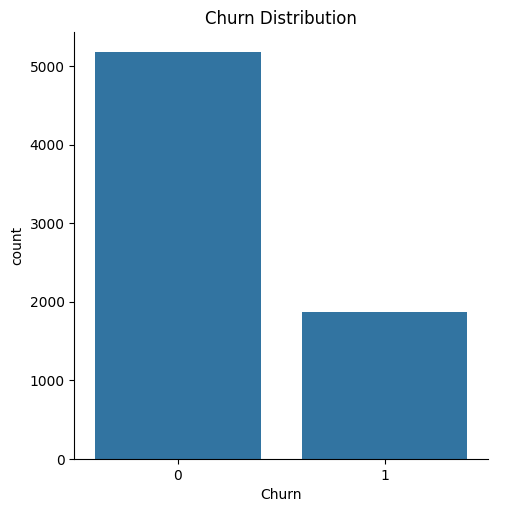

In [18]:
plt.figure(figsize=(10, 6))
sns.catplot(x='Churn', data=final_df, kind='count')
plt.title('Churn Distribution')
plt.show()

In [19]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 

X = final_df.drop('Churn', axis=1)
y = final_df['Churn']

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_sampled,y_sampled=smote.fit_resample(X,y)
y_sampled.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

# Splitting & Build Model

Scaling & Splitting Dataset

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import joblib
import os
import numpy as np

os.makedirs('models', exist_ok=True)

In [77]:

X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=42, stratify=y_sampled
)

col_scale = ['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges']

scaler = StandardScaler()
X_train[col_scale] = scaler.fit_transform(X_train[col_scale])
X_test[col_scale] = scaler.transform(X_test[col_scale])


Hyperparameter & Classifier Tuning

In [38]:
classifiers = {
    'rf': RandomForestClassifier(random_state=42),
    'svm': SVC(probability=True, random_state=42),
    'lr': LogisticRegression(max_iter=1000, random_state=42)
}

param_grid = [
    {
        'clf': [classifiers['rf']],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [None, 10, 20],
        'clf__min_samples_split': [2, 5,10],
        'clf__min_samples_leaf': [1, 2],
        'clf__bootstrap': [True,False]
    },
    {
        'clf': [classifiers['svm']],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']
    },
    {
        'clf': [classifiers['lr']],
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__penalty': ['l2'],
        'clf__solver': ['lbfgs']
    }
]

pipeline = Pipeline([
    ('clf', classifiers['rf'])
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Estimator:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

os.makedirs('models', exist_ok=True)
joblib.dump(grid_search.best_estimator_, 'models/best_model.pkl')

Fitting 10 folds for each of 88 candidates, totalling 880 fits
Best Estimator: Pipeline(steps=[('clf',
                 RandomForestClassifier(min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=200,
                                        random_state=42))])
Best Parameters: {'clf': RandomForestClassifier(random_state=42), 'clf__bootstrap': True, 'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10, 'clf__n_estimators': 200}
Best CV Accuracy: 0.8630120802154344


['models/best_model.pkl']

In [41]:
joblib.dump(grid_search, 'models/grid_search.pkl')

['models/grid_search.pkl']

In [ ]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load pipeline
best_pipeline = joblib.load('models/best_model.pkl')
gs = joblib.load("models/grid_search.pkl")

if isinstance(best_pipeline.named_steps['clf'], RandomForestClassifier):
    rf_model = best_pipeline.named_steps['clf']

y_train_pred = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)

print("=== MODEL ORIGINAL ===")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
mean_cv_score = gs.cv_results_['mean_test_score'][gs.best_index_]
std_cv_score = gs.cv_results_['std_test_score'][gs.best_index_]

print(f"Cross Validation Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}")
print("\nClassification Report (Original Features):")
print(classification_report(y_test, y_pred))

=== MODEL ORIGINAL ===
Train Accuracy: 0.9238
Test Accuracy:  0.8623
Cross Validation Accuracy: 0.8630 ± 0.0089

Classification Report (Original Features):
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1035
           1       0.88      0.85      0.86      1035

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [72]:
importances_rf = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances_rf
}).sort_values('importance', ascending=False)

=== THRESHOLD EVALUATION RESULTS ===
   Threshold  Num_Features  Test_Accuracy  CV_Accuracy_Mean  CV_Accuracy_Std
0      0.005            35       0.855556          0.852259         0.009811
1      0.010            26       0.848792          0.855762         0.008318
2      0.015            17       0.853140          0.847908         0.008249
3      0.020            16       0.851691          0.847668         0.006854
4      0.025            13       0.855072          0.847184         0.008156
5      0.030            10       0.851208          0.842472         0.011441


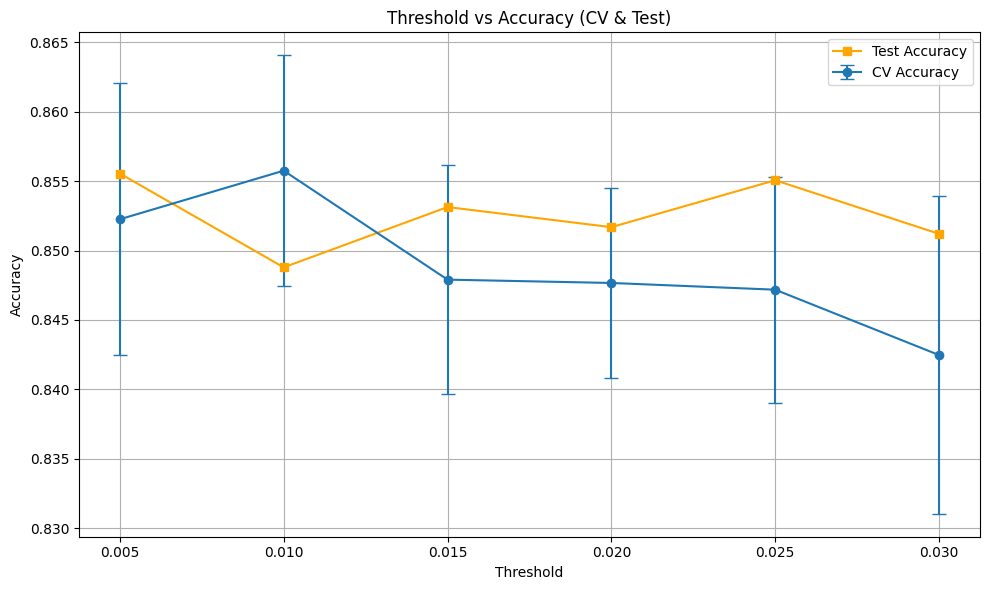

In [ ]:
thresholds = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03]

results = []

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for t in thresholds:
    selected = importance_df[importance_df['importance'] >= t]['feature']
    if len(selected) < 2:
        continue

    X_train_sel = X_train[selected]
    X_test_sel = X_test[selected]

    rf = RandomForestClassifier(random_state=42)

    rf.fit(X_train_sel, y_train)
    y_pred_sel = rf.predict(X_test_sel)
    test_acc = accuracy_score(y_test, y_pred_sel)

    cv_scores = cross_val_score(rf, X_train_sel, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    results.append({
        'Threshold': t,
        'Num_Features': len(selected),
        'Test_Accuracy': test_acc,
        'CV_Accuracy_Mean': cv_mean,
        'CV_Accuracy_Std': cv_std
    })

results_df = pd.DataFrame(results)

print("=== THRESHOLD EVALUATION RESULTS ===")
print(results_df)

plt.figure(figsize=(10, 6))
plt.errorbar(results_df['Threshold'], results_df['CV_Accuracy_Mean'],
             yerr=results_df['CV_Accuracy_Std'], fmt='-o', capsize=5, label='CV Accuracy')
plt.plot(results_df['Threshold'], results_df['Test_Accuracy'], '-s', label='Test Accuracy', color='orange')
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Threshold vs Accuracy (CV & Test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

=== FEATURE IMPORTANCE ANALYSIS ===

Features with importance >= 0.005: 35
Features to drop: 10
Important Features: 
                                         feature  importance
32                  cat__Contract_Month-to-month    0.104022
14                        cat__OnlineSecurity_No    0.078709
39           cat__PaymentMethod_Electronic check    0.076435
23                           cat__TechSupport_No    0.070081
42                                   num__tenure    0.067422
44                             num__TotalCharges    0.066129
17                          cat__OnlineBackup_No    0.045707
43                           num__MonthlyCharges    0.045050
34                        cat__Contract_Two year    0.038142
16                       cat__OnlineSecurity_Yes    0.032540
12              cat__InternetService_Fiber optic    0.026568
36                     cat__PaperlessBilling_Yes    0.026171
25                          cat__TechSupport_Yes    0.025936
35                      cat__

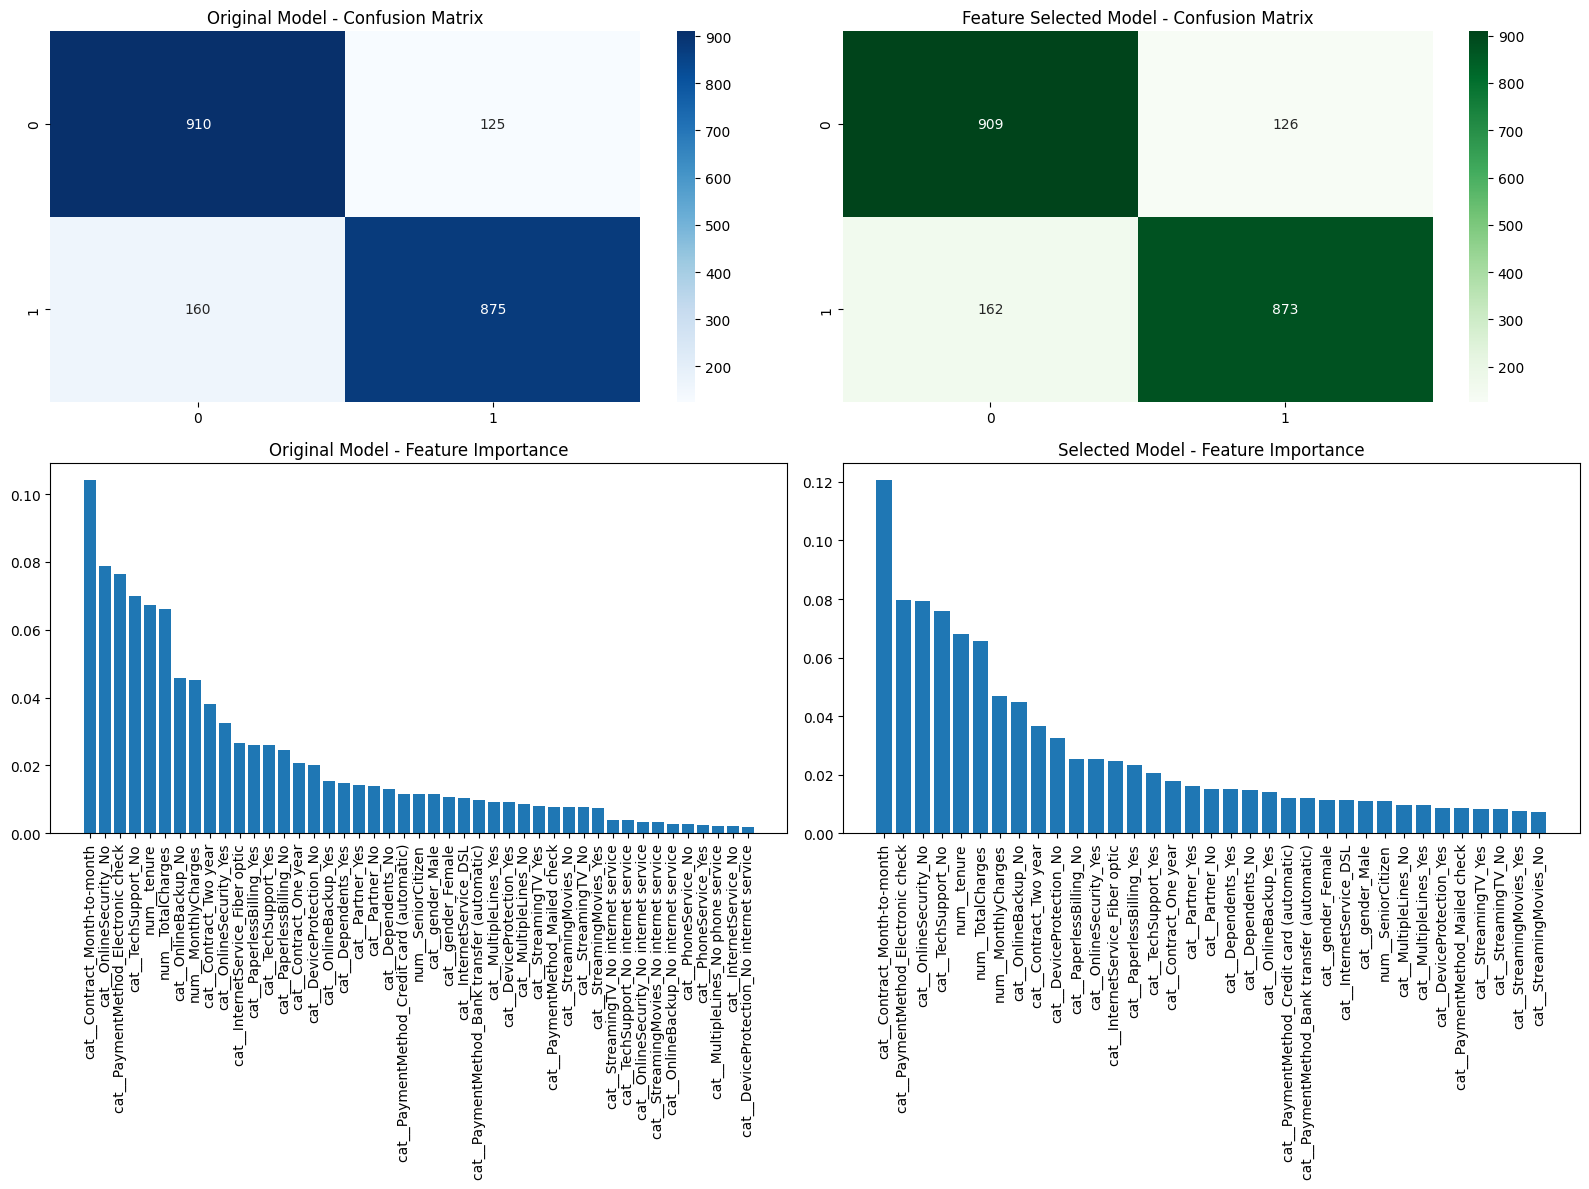


=== SUMMARY ===
Original Model Accuracy: 0.8623
Selected Model Accuracy: 0.8609
Feature reduction: 45 -> 35 (22.2% reduction)


In [ ]:
print("=== FEATURE IMPORTANCE ANALYSIS ===")

threshold = 0.005 
important_features = importance_df[importance_df['importance'] >= threshold]['feature'].tolist()

print(f"\nFeatures with importance >= {threshold}: {len(important_features)}")
print(f"Features to drop: {len(X_train.columns) - len(important_features)}")
print(f"Important Features: \n{importance_df[importance_df['importance'] >= threshold]}")

X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

print(f'\nThreshold: {threshold}')
print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {X_train_selected.shape[1]}")

print("=== RETRAINING MODEL SETELAH FEATURE SELECTION ===")
rf_model_selected = RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=42,bootstrap=True,max_features='sqrt')

rf_model_selected.fit(X_train_selected, y_train)

y_train_pred_selected = rf_model_selected.predict(X_train_selected)
y_pred_selected = rf_model_selected.predict(X_test_selected)

train_accuracy_selected = accuracy_score(y_train, y_train_pred_selected)
test_accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Train Accuracy: {train_accuracy_selected:.4f}")
print(f"Test Accuracy:  {test_accuracy_selected:.4f}")

# Cross Validation untuk model baru
if 'X_sampled' in locals() and 'y_sampled' in locals():
    X_sampled_selected = X_sampled[important_features]
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores_selected = cross_val_score(rf_model_selected, X_sampled_selected, y_sampled, cv=skf, scoring='accuracy')
    print(f"Cross Validation Accuracy: {cv_scores_selected.mean():.4f} ± {cv_scores_selected.std():.4f}")

print("\nClassification Report (Selected Features):")
print(classification_report(y_test, y_pred_selected))

# Plot 2 x 2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Confusion Matrix - Original Model
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Original Model - Confusion Matrix')

# Confusion Matrix - Selected Features Model
sns.heatmap(confusion_matrix(y_test, y_pred_selected), annot=True, fmt='d', cmap='Greens', ax=axes[0,1])
axes[0,1].set_title('Feature Selected Model - Confusion Matrix')

importances_rf = rf_model.feature_importances_

# Feature Importance - Original Model 
sorted_idx = np.argsort(importances_rf)[::-1]
sorted_importances = importances_rf[sorted_idx]
sorted_features = X_train.columns[sorted_idx]

axes[1, 0].bar(range(len(sorted_idx)), sorted_importances, tick_label=sorted_features)
axes[1, 0].set_xticks(range(len(sorted_idx)))
axes[1, 0].set_xticklabels(sorted_features, rotation=90)
axes[1, 0].set_title('Original Model - Feature Importance')

# Feature Importance - Selected Features Model
importances_selected = rf_model_selected.feature_importances_
sorted_idx_selected = np.argsort(importances_selected)[::-1]
sorted_features_selected = [important_features[i] for i in sorted_idx_selected]

axes[1, 1].bar(range(len(importances_selected)), importances_selected[sorted_idx_selected],
               tick_label=sorted_features_selected)
axes[1, 1].set_xticks(range(len(importances_selected)))
axes[1, 1].set_xticklabels(sorted_features_selected, rotation=90)
axes[1, 1].set_title('Selected Model - Feature Importance')

plt.tight_layout()
plt.show()

# Summary Model
print(f"\n=== SUMMARY ===")
print(f"Original Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Selected Model Accuracy: {accuracy_score(y_test, y_pred_selected):.4f}")
print(f"Feature reduction: {X_train.shape[1]} -> {X_train_selected.shape[1]} ({((X_train.shape[1] - X_train_selected.shape[1]) / X_train.shape[1] * 100):.1f}% reduction)")

# Save model baru (jika performa lebih bagus)
if test_accuracy_selected >= accuracy_score(y_test, y_pred) * 0.95:
    joblib.dump((rf_model_selected, important_features), "models/best_model_selected_features.pkl")
